In [2]:
using Pkg
Pkg.activate(joinpath(@__DIR__, ".."))

  Activating project at `~/Documents/programming/julia/Hippocampus`


In [8]:
using CairoMakie
using Distributions
includet("test.jl")
CairoMakie.activate!()

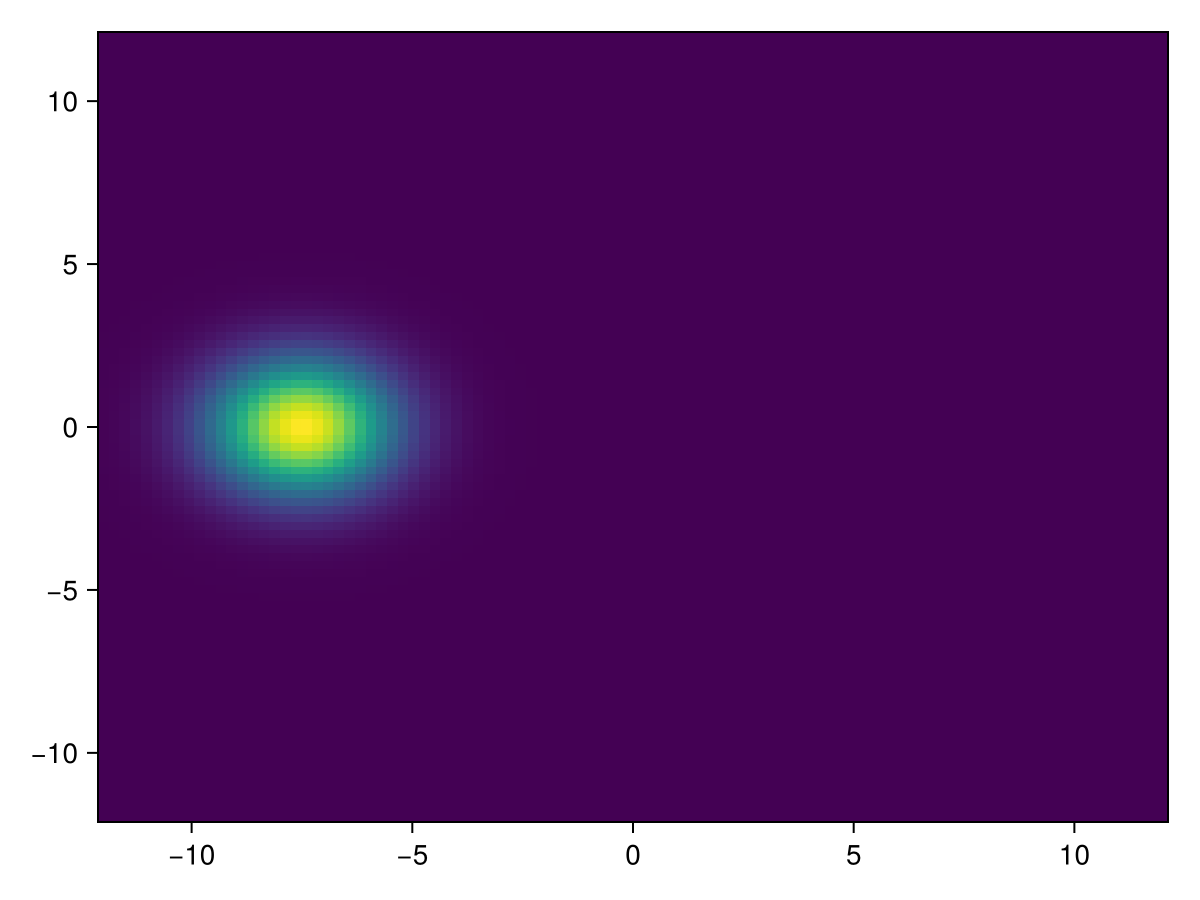

In [9]:
# simulate a place cell with a narrow field in the middle left part of the arena
μ=[-7.5, 0.0]
σ=2.0
Σ = [σ 0.0;0.0 σ]
G = MvNormal(μ, Σ)
xx =  range(-12.0, stop=12.0, length=100)
yy =  range(-12.0, stop=12.0, length=100)

mmp = [pdf(G, [x,y]) for x in xx, y in yy]
fig,ax = heatmap(xx,yy,mmp)
fig

In [11]:
# now we can simulate spikes for this cell using real behavioural data. We first load the unity data object and the ripple data object from a real session
datadir = "/Volumes/Drive1/data/Hippocampus"
unity_file = joinpath(datadir,"Picasso/20180706/session01/RawData_T1-100/session_1_67201811953.txt")
udata = SpatialAnalyses.UnityData(unity_file)
ripple_file = joinpath(datadir,"Picasso/20180706/session01/180706_Block1.nev")
rdata = SpatialAnalyses.RippleData(ripple_file)


Main.SpatialAnalyses.RippleData([12 22 32; 15 25 35; … ; 16 26 36; 11 21 31], [9.1376 10.1465 16.457833333333333; 18.488966666666666 19.504966666666668 27.7434; … ; 5272.8136 5273.8336 5279.064866666667; 5281.075 5282.089033333334 5287.5763], Dict{Any, Any}())

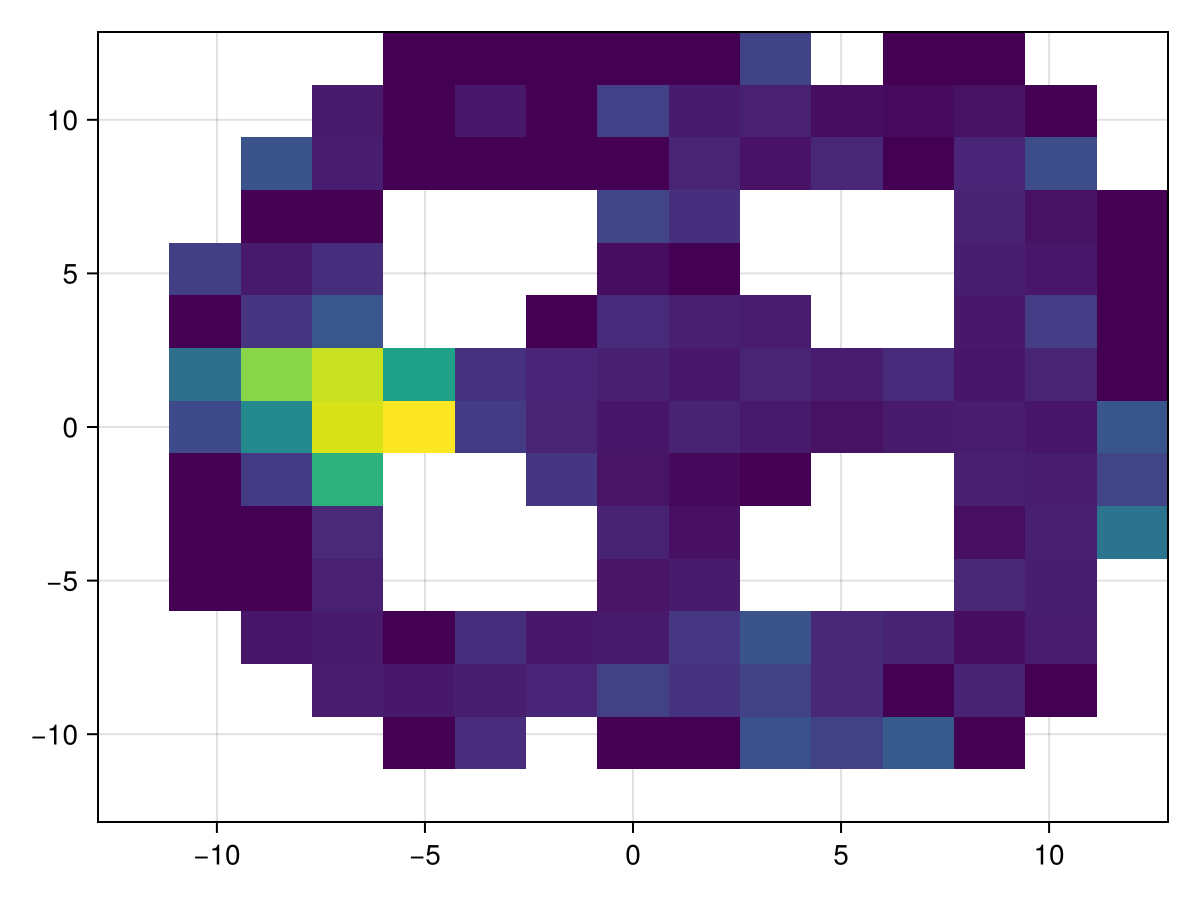

In [13]:
# now we run the actual simulation
spikes = SpatialAnalyses.model_place_field(udata,rdata;λmax=2.0,dt=0.001,σ=σ, μ=μ)

# estimate the place field from the spike data
mm, xbins, ybins = SpatialAnalyses.get_spatial_map(udata, SpatialAnalyses.Spiketrain(spikes*1000, "", 1), rdata;nbins=(15,15))

# and plot it
heatmap(xbins, ybins, mm)

Notice that the two maps do not exactly coincide. Since the behaviour obviously was not influenced by this place cell (since we were simulating it), the map gets distorted by the actual behaviour. That is to say, the above map was created by normalizing the raw map from the spikes with the map of where the subject tended to spend its time.

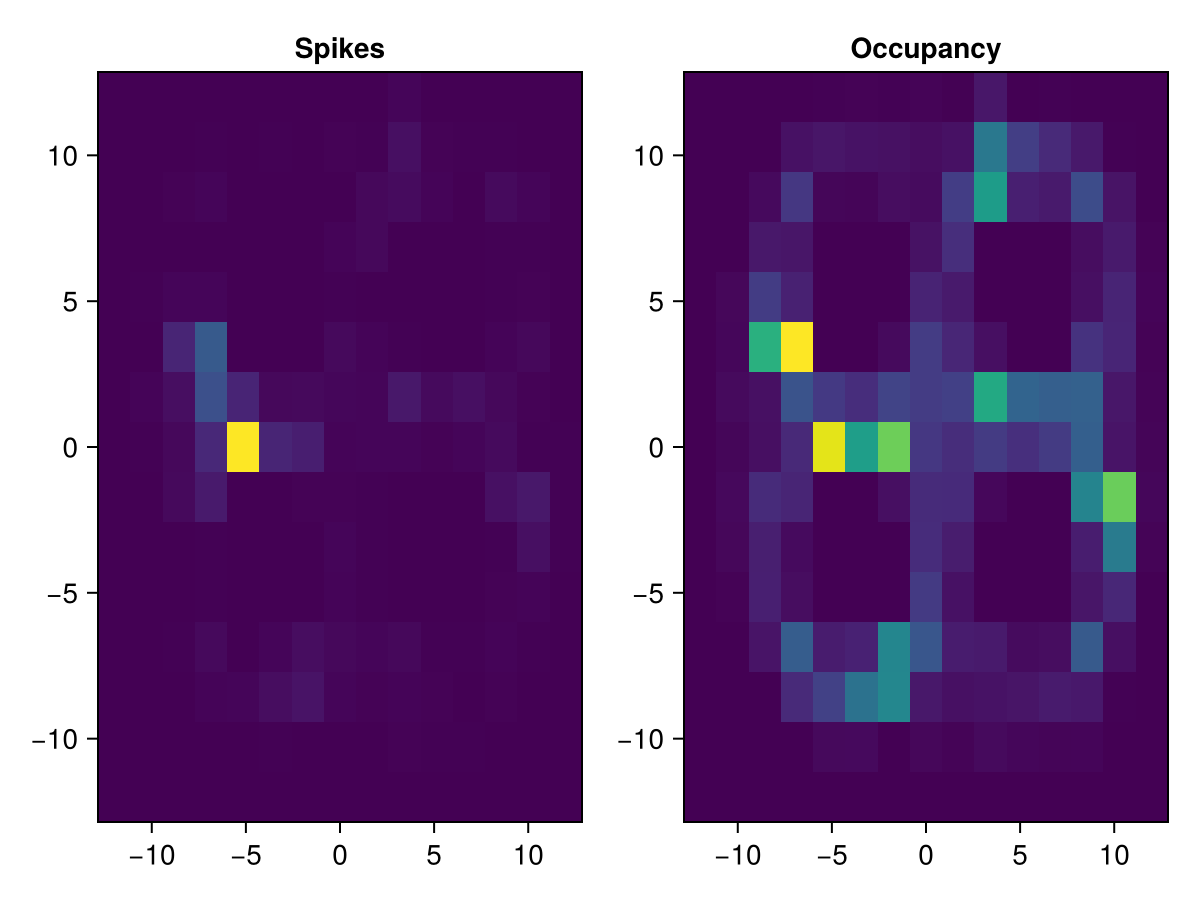

In [18]:
_,_,mmg = SpatialAnalyses.get_spatial_map(udata;nbins=(15,15))
mm, xbins, ybins = SpatialAnalyses.get_spatial_map(udata, SpatialAnalyses.Spiketrain(spikes*1000, "", 1), rdata;nbins=(15,15),normalize_by_occupancy=false)
fig = Figure()
ax1 = Axis(fig[1,1])
ax1.title = "Spikes"
heatmap!(ax1, xbins, ybins, mm)
ax2 = Axis(fig[1,2])
ax2.title = "Occupancy"
heatmap!(ax2, xbins, ybins, mmg)
fig

From the occupancy map on the right, that is the map of where the subject actually spends its time, we see that centre of this cell's place field is hardly ever visited. On the other hand, the periphery is visited, and in particular the point around (0.0, -6) is visited often. This explains why the field is shifted. We can confirm this by simulating another cell with a place field at for instance (0.0, -5.0)

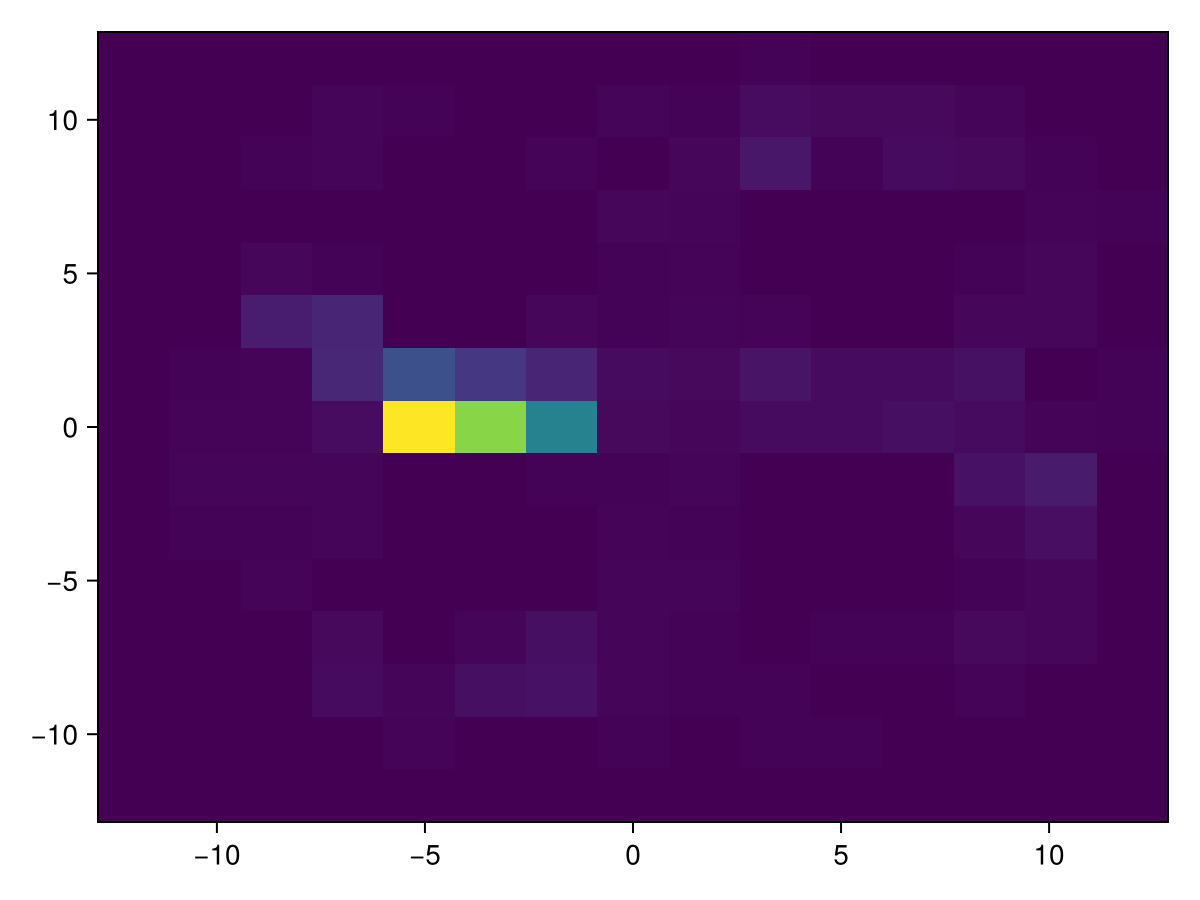

In [21]:
spikes = SpatialAnalyses.model_place_field(udata,rdata;λmax=2.0,dt=0.001,σ=σ, μ=[-5.0, 0.0])
mm, xbins, ybins = SpatialAnalyses.get_spatial_map(udata, SpatialAnalyses.Spiketrain(spikes*1000, "", 1), rdata;nbins=(15,15), normalize_by_occupancy=false)

heatmap(xbins, ybins, mm)

Now, the centre of the field matches the centre of the actual place field.